In [9]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '94e16e97-491e-4ca2-9d73-63402015be08',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [10]:
type(data)

dict

In [13]:
import pandas as pd

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None) 

In [15]:
df=pd.json_normalize(data['data'])

In [17]:
# in order to be able to see what time is the data getting pulled, a new column for timestamp can be added
df['timestamp']=pd.to_datetime('now')

In [19]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.973786e+07,1.973786e+07,False,NaN,1,NaN,NaN,None,2024-08-10T06:57:00.000Z,60476.299745,2.949304e+10,-32.0560,0.070478,-0.767020,-2.062017,4.264822,-10.302474,-0.755217,1.193673e+12,56.4185,1.270002e+12,None,2024-08-10T06:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-10 12:28:54.318347
1,1027,Ethereum,ETH,ethereum,9202,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202654e+08,1.202654e+08,True,NaN,2,NaN,NaN,None,2024-08-10T06:56:00.000Z,2623.481374,1.604016e+10,-30.3726,0.546515,-2.536105,-12.119820,-15.558163,-25.908261,-10.092571,3.155140e+11,14.9107,3.155140e+11,None,2024-08-10T06:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-10 12:28:54.318347
2,825,Tether USDt,USDT,tether,93886,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.154047e+11,1.170681e+11,True,NaN,3,NaN,NaN,None,2024-08-10T06:56:00.000Z,1.000272,4.931479e+10,-29.9913,-0.010323,-0.013914,0.132310,0.036586,0.088011,0.062671,1.154360e+11,5.4545,1.170999e+11,None,2024-08-10T06:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-10 12:28:54.318347
3,1839,BNB,BNB,bnb,2206,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459366e+08,1.459366e+08,False,NaN,4,NaN,NaN,None,2024-08-10T06:56:00.000Z,510.679420,1.505007e+09,-13.4443,0.214357,-0.334061,-6.073512,-3.002969,-16.685205,-13.461308,7.452684e+10,3.5215,7.452684e+10,None,2024-08-10T06:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-10 12:28:54.318347
4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.664509e+08,5.819546e+08,True,NaN,5,NaN,NaN,None,2024-08-10T06:56:00.000Z,154.697844,2.836828e+09,-40.9182,0.156872,-1.845914,1.431627,9.189249,0.685472,5.581036,7.215895e+10,3.4101,9.002712e+10,None,2024-08-10T06:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-10 12:28:54.318347
5,3408,USDC,USDC,usd-coin,21451,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.448034e+10,3.448034e+10,False,NaN,6,NaN,NaN,None,2024-08-10T06:56:00.000Z,0.999949,5.672243e+09,-30.3880,-0.007354,-0.021406,-0.002987,-0.004617,0.008170,-0.003112,3.447858e+10,1.6296,3.447858e+10,None,2024-08-10T06:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-10 12:28:54.318347
6,52,XRP,XRP,xrp,1364,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.610436e+10,9.998737e+10,False,NaN,7,NaN,NaN,None,2024-08-10T06:57:00.000Z,0.588571,1.729846e+09,-38.9859,0.521415,-2.131257,2.669297,32.372725,21.272929,16.220159,3.302137e+10,1.5599,5.885705e+10,None,2024-08-10T06:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-10 12:28:54.318347
7,11419,Toncoin,TON,toncoin,501,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.518387e+09,5.110263e+09,True,NaN,8,3.414167e+09,2.285315e+10,None,2024-08-10T06:56:00.000Z,6.693626,5.955772e+08,-41.7461,0.353627,2.968509,8.976551,-6.568175,-2.682770,-3.447063,1.685714e+10,0.7967,3.420619e+10,None,2024-08-10T06:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-10 12:28:54.318347
8,74,Dogecoin,DOGE,dogecoin,1034,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-excha

In [60]:
def api_runner():
    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '94e16e97-491e-4ca2-9d73-63402015be08',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2=pd.json_normalize(data['data'])
    df2['timestamp']=pd.to_datetime('now')
    df=pd.concat([df,df2])

    if not os.path.isfile(r'C:\Users\Win10\Desktop\dataset\API.csv'):
        df.to_csv(r'C:\Users\Win10\Desktop\dataset\API.csv',header='column_names')
    else:
        df.to_csv(r'C:\Users\Win10\Desktop\dataset\API.csv',mode='a',header=False)

In [9]:
import os 
from time import time 
from time import sleep

for i in range(333):# because we have a maximum of 333 calls each day
    api_runner()
    print('API runner completed successfully')
    sleep(60) # sleep for 1 minute
exit()

In [21]:
pd.set_option('display.float_format', lambda x:'%.5f' %x)

In [23]:
df3=df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

In [25]:
df4=df3.stack() 

In [27]:
type(df3) 

pandas.core.frame.DataFrame

In [29]:
type(df4)

pandas.core.series.Series

In [31]:
df5=df4.to_frame(name='values') # using column header as rows under the same index

In [33]:
type(df5)
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.07048
             quote.USD.percent_change_24h  -0.76702
             quote.USD.percent_change_7d   -2.06202
             quote.USD.percent_change_30d   4.26482
             quote.USD.percent_change_60d -10.30247
             quote.USD.percent_change_90d  -0.75522
Ethereum     quote.USD.percent_change_1h    0.54652
             quote.USD.percent_change_24h  -2.53611
             quote.USD.percent_change_7d  -12.11982
             quote.USD.percent_change_30d -15.55816
             quote.USD.percent_change_60d -25.90826
             quote.USD.percent_change_90d -10.09257
Tether USDt  quote.USD.percent_change_1h   -0.01032
             quote.USD.percent_change_24h  -0.01391
             quote.USD.percent_change_7d    0.13231
             quote.USD.percent_change_30d   0.03659
             quote.USD.percent_change_60d   0.08801
             quote.USD.percent_change_90d   0.06267
BNB          quote.USD.percent_change_1h    0.21436
             quote.USD.percent_change_24h  -0.33406
             quote.USD.percent_change_7d   -6.07351
             quote.USD.percent_change_30d  -3.00297
             quote.USD.percent_change_60d -16.68520
             quote.USD.percent_change_90d -13.46131
Solana       quote.USD.percent_change_1h    0.15687
             quote.USD.percent_change_24h  -1.84591
             quote.USD.percent_change_7d    1.43163
             quote.USD.percent_change_30d   9.18925
             quote.USD.percent_change_60d   0.68547
             quote.USD.percent_change_90d   5.58104
USDC         quote.USD.percent_change_1h   -0.00735
             quote.USD.percent_change_24h  -0.02141
             quote.USD.percent_change_7d   -0.00299
             quote.USD.percent_change_30d  -0.00462
             quote.USD.percent_change_60d   0.00817
             quote.USD.percent_change_90d  -0.00311
XRP          quote.USD.percent_change_1h    0.52141
             quote.USD.percent_change_24h  -2.13126
             quote.USD.percent_change_7d    2.66930
             quote.USD.percent_change_30d  32.37273
             quote.USD.percent_change_60d  21.27293
             quote.USD.percent_change_90d  16.22016
Toncoin      quote.USD.percent_change_1h    0.35363
             quote.USD.percent_change_24h   2.96851
             quote.USD.percent_change_7d    8.97655
             quote.USD.percent_change_30d  -6.56818
             quote.USD.percent_change_60d  -2.68277
             quote.USD.percent_change_90d  -3.44706
Dogecoin     quote.USD.percent_change_1h    0.41029
             quote.USD.percent_change_24h  -0.68605
             quote.USD.percent_change_7d   -8.38795
             quote.USD.percent_change_30d  -3.90983
             quote.USD.percent_change_60d -25.99310
             quote.USD.percent_change_90d -27.31723
Cardano      quote.USD.percent_change_1h    0.05375
             quote.USD.percent_change_24h  -0.66146
             quote.USD.percent_change_7d   -6.58044
             quote.USD.percent_change_30d -11.76987
             quote.USD.percent_change_60d -19.60970
             quote.USD.percent_change_90d -21.31123
TRON         quote.USD.percent_change_1h   -0.02778
             quote.USD.percent_change_24h   1.61459
             quote.USD.percent_change_7d    3.69455
             quote.USD.percent_change_30d  -3.84548
             quote.USD.percent_change_60d  10.61260
             quote.USD.percent_change_90d   1.55587
Avalanche    quote.USD.percent_change_1h    0.28259
             quote.USD.percent_change_24h  -1.06309
             quote.USD.percent_change_7d   -9.19846
             quote.USD.percent_change_30d -15.78550
             quote.USD.percent_change_60d -32.83443
             quote.USD.percent_change_90d -35.69483
Shiba Inu    quote.USD.percent_change_1h    0.16843
             quote.USD.percent_change_24h   0.07459
             quote.USD.percent_change_7d   -4.96289
             quote.USD.percent_change_30d

In [35]:
df5.reset_index(inplace=True) # to set a new index for the dataframe 

In [37]:
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.07048
1,Bitcoin,quote.USD.percent_change_24h,-0.76702
2,Bitcoin,quote.USD.percent_change_7d,-2.06202
3,Bitcoin,quote.USD.percent_change_30d,4.26482
4,Bitcoin,quote.USD.percent_change_60d,-10.30247
5,Bitcoin,quote.USD.percent_change_90d,-0.75522
6,Ethereum,quote.USD.percent_change_1h,0.54652
7,Ethereum,quote.USD.percent_change_24h,-2.53611
8,Ethereum,quote.USD.percent_change_7d,-12.11982
9,Ethereum,quote.USD.percent_change_30d,-15.55816


In [47]:
df5.rename(columns={'level_1':'percent change'},inplace=True)

In [49]:
df5

,name,percent change,values
0,Bitcoin,quote.USD.percent_change_1h,0.07048
1,Bitcoin,quote.USD.percent_change_24h,-0.76702
2,Bitcoin,quote.USD.percent_change_7d,-2.06202
3,Bitcoin,quote.USD.percent_change_30d,4.26482
4,Bitcoin,quote.USD.percent_change_60d,-10.30247
5,Bitcoin,quote.USD.percent_change_90d,-0.75522
6,Ethereum,quote.USD.percent_change_1h,0.54652
7,Ethereum,quote.USD.percent_change_24h,-2.53611
8,Ethereum,quote.USD.percent_change_7d,-12.11982
9,Ethereum,quote.USD.percent_change_30d,-15.55816


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
df5['percent change']=df5['percent change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df5

,name,percent change,values
0,Bitcoin,1h,0.07048
1,Bitcoin,24h,-0.76702
2,Bitcoin,7d,-2.06202
3,Bitcoin,30d,4.26482
4,Bitcoin,60d,-10.30247
5,Bitcoin,90d,-0.75522
6,Ethereum,1h,0.54652
7,Ethereum,24h,-2.53611
8,Ethereum,7d,-12.11982
9,Ethereum,30d,-15.55816


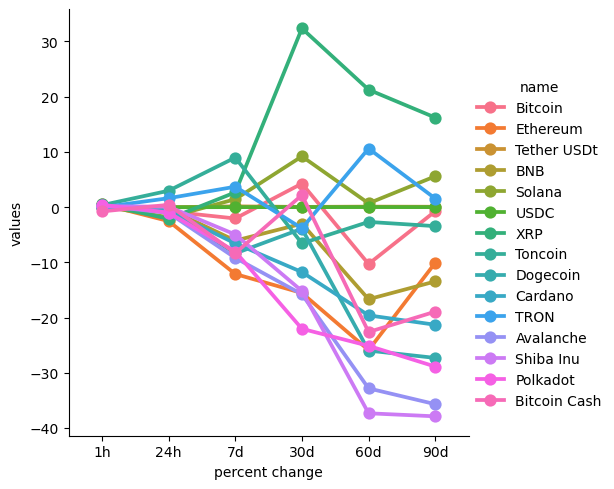

In [55]:
sns.catplot(x='percent change',y='values',hue='name',data=df5,kind='point')

In [57]:
df10=df[['name','quote.USD.price','timestamp']]

In [59]:
df10

,name,quote.USD.price,timestamp
0,Bitcoin,60476.29975,2024-08-10 12:28:54.318347
1,Ethereum,2623.48137,2024-08-10 12:28:54.318347
2,Tether USDt,1.00027,2024-08-10 12:28:54.318347
3,BNB,510.67942,2024-08-10 12:28:54.318347
4,Solana,154.69784,2024-08-10 12:28:54.318347
5,USDC,0.99995,2024-08-10 12:28:54.318347
6,XRP,0.58857,2024-08-10 12:28:54.318347
7,Toncoin,6.69363,2024-08-10 12:28:54.318347
8,Dogecoin,0.10416,2024-08-10 12:28:54.318347
9,Cardano,0.34639,2024-08-10 12:28:54.318347


In [61]:
df10=df10.query("name=='Bitcoin'") 

In [352]:
df10

,name,quote.USD.price,timestamp
0,Bitcoin,55284.57968,2024-08-06 17:22:13.065101
0,Bitcoin,55211.62903,2024-08-06 17:31:59.011640
0,Bitcoin,55331.39622,2024-08-06 17:33:00.167275
0,Bitcoin,55209.99941,2024-08-06 17:34:34.547528
0,Bitcoin,55209.99941,2024-08-06 17:35:38.072755
0,Bitcoin,55312.44137,2024-08-06 17:36:40.721231
0,Bitcoin,55369.48201,2024-08-06 17:50:04.430581
0,Bitcoin,55405.89763,2024-08-06 17:51:07.053348
0,Bitcoin,55385.77503,2024-08-06 17:55:12.080399
0,Bitcoin,55385.77503,2024-08-06 17:55:25.632901


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

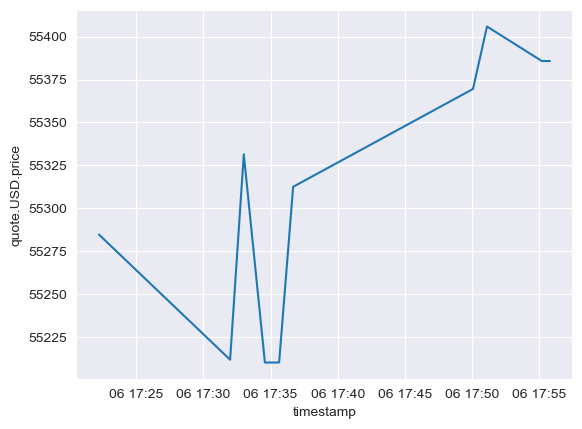

In [362]:
sns.set_style("darkgrid")
sns.lineplot(x='timestamp',y='quote.USD.price',data=df10)